### Hear Disease Logistic Regression

In [44]:
import numpy as np 
import pandas as pd 

## Reading the Dataset

In [45]:

# Use the raw GitHub URL to read the file
url = 'https://raw.githubusercontent.com/Arko336/HeartDiseaseEDA/main/heart_failure_clinical_records_dataset.csv'

df = pd.read_csv(url)

print(df.head())


    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [46]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [47]:
# Checking the basic stats
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [48]:
# Checking for dtype and non nullcount

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [49]:
df.isna().mean() * 100 

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64

***We do not see any null values in the dataset***

***We can start with the EDA***

# EDA

In [50]:
# importing basic libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [51]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

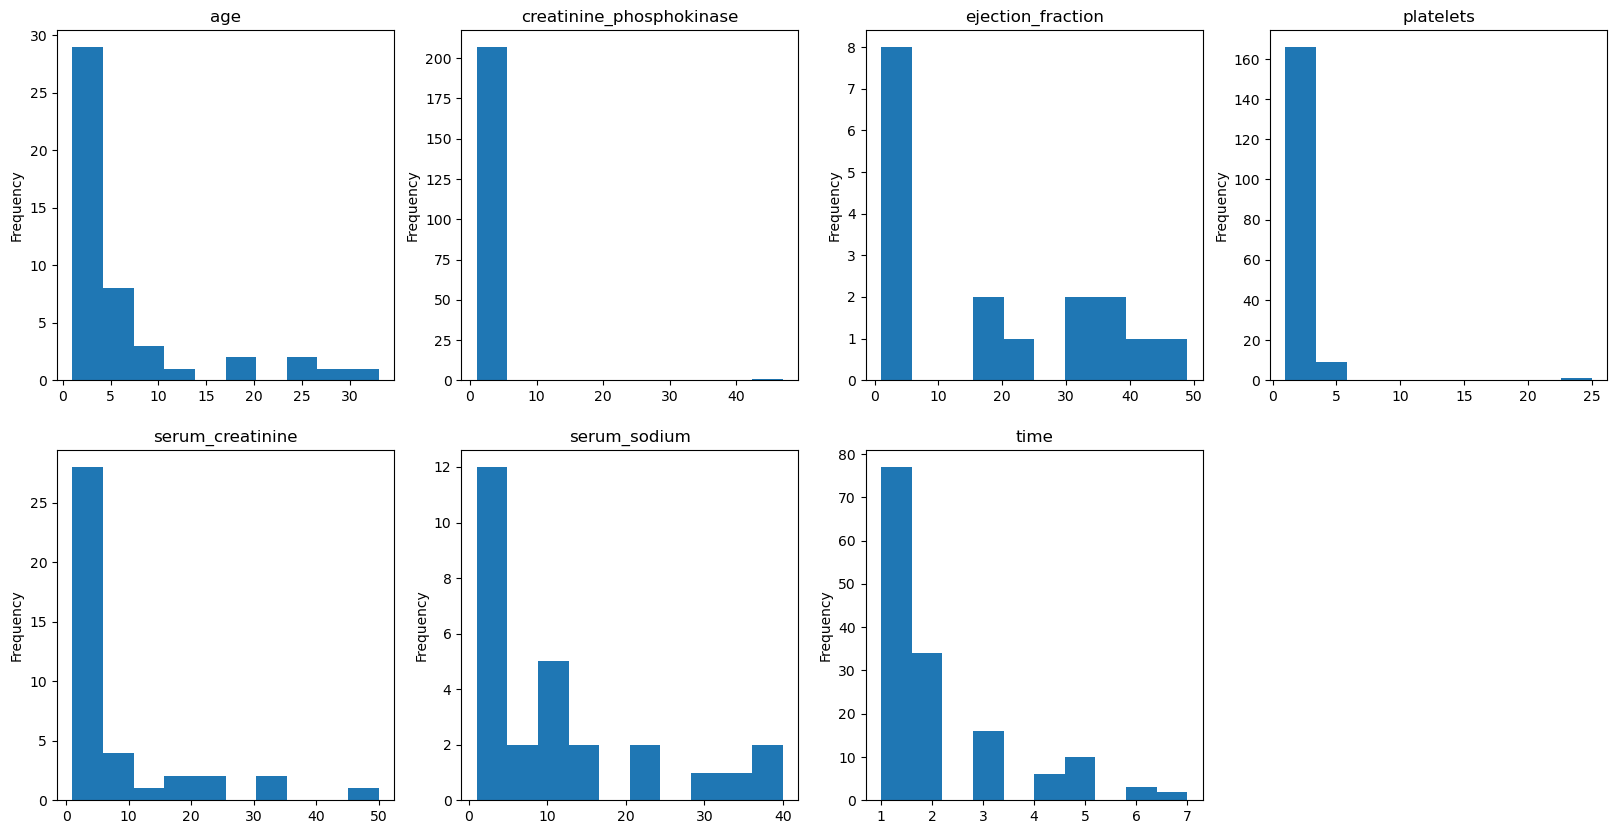

In [52]:
num_col = ['age', 'creatinine_phosphokinase',
       'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time']
j = 1 
fig = plt.figure(figsize =(20,10))
for i in num_col: 
    plt.subplot(2,4,j)
    df[i].value_counts().plot(kind ='hist')
    plt.title(i)
    j=j+1

plt.show()

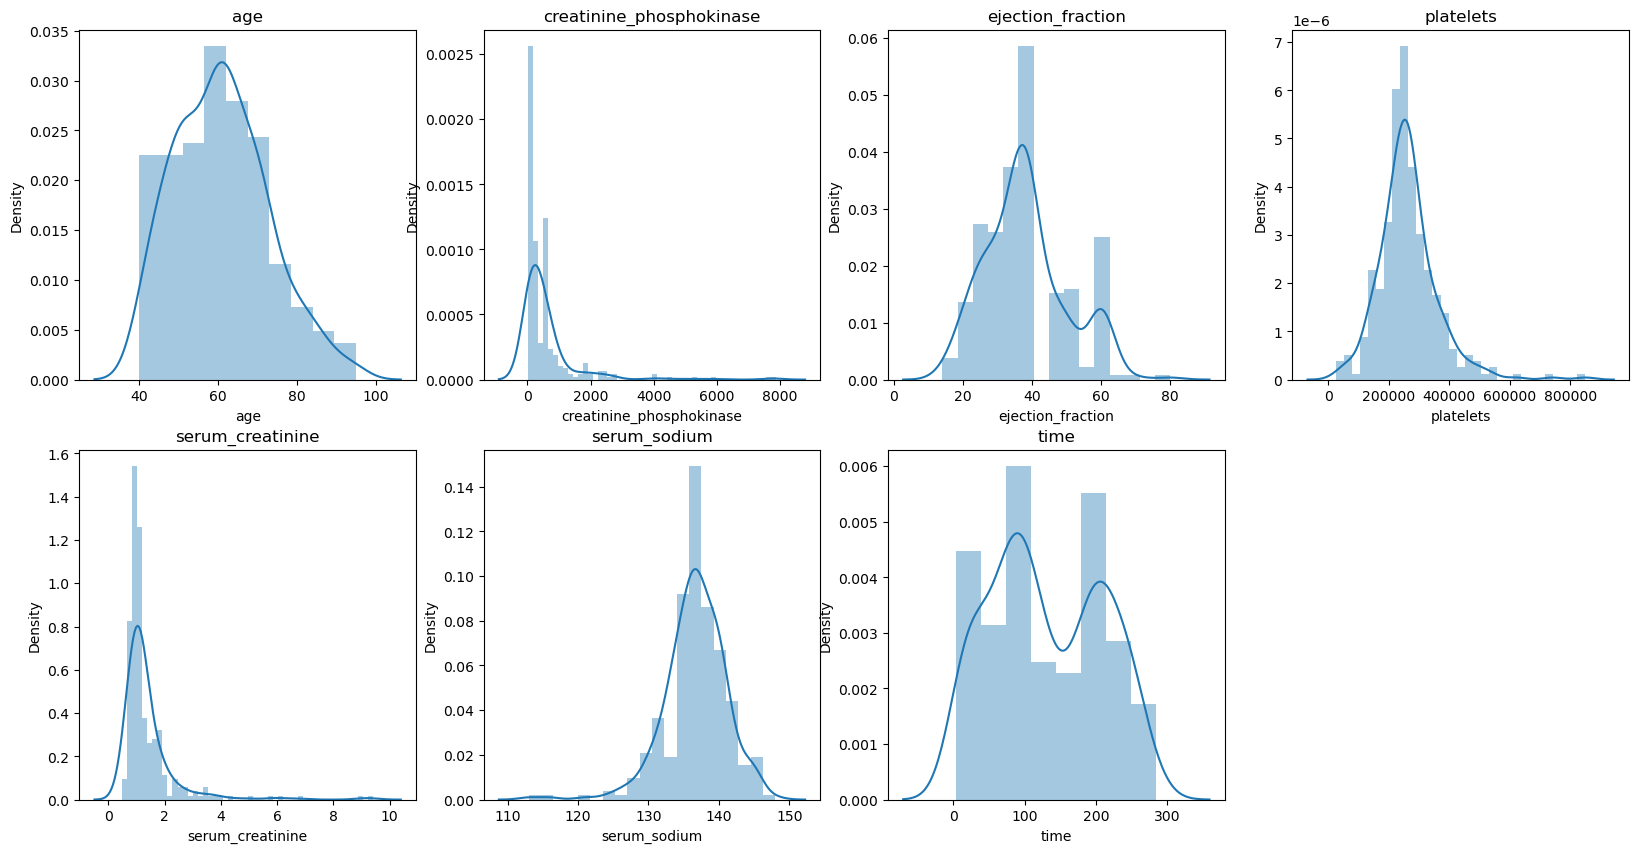

In [53]:
j = 1 

fig = plt.figure(figsize =(20,10))
for i in num_col: 
    plt.subplot(2,4,j)
    sns.distplot(df[i])
    plt.title(i)
    j=j+1

plt.show()

All the numerical fields are skewed

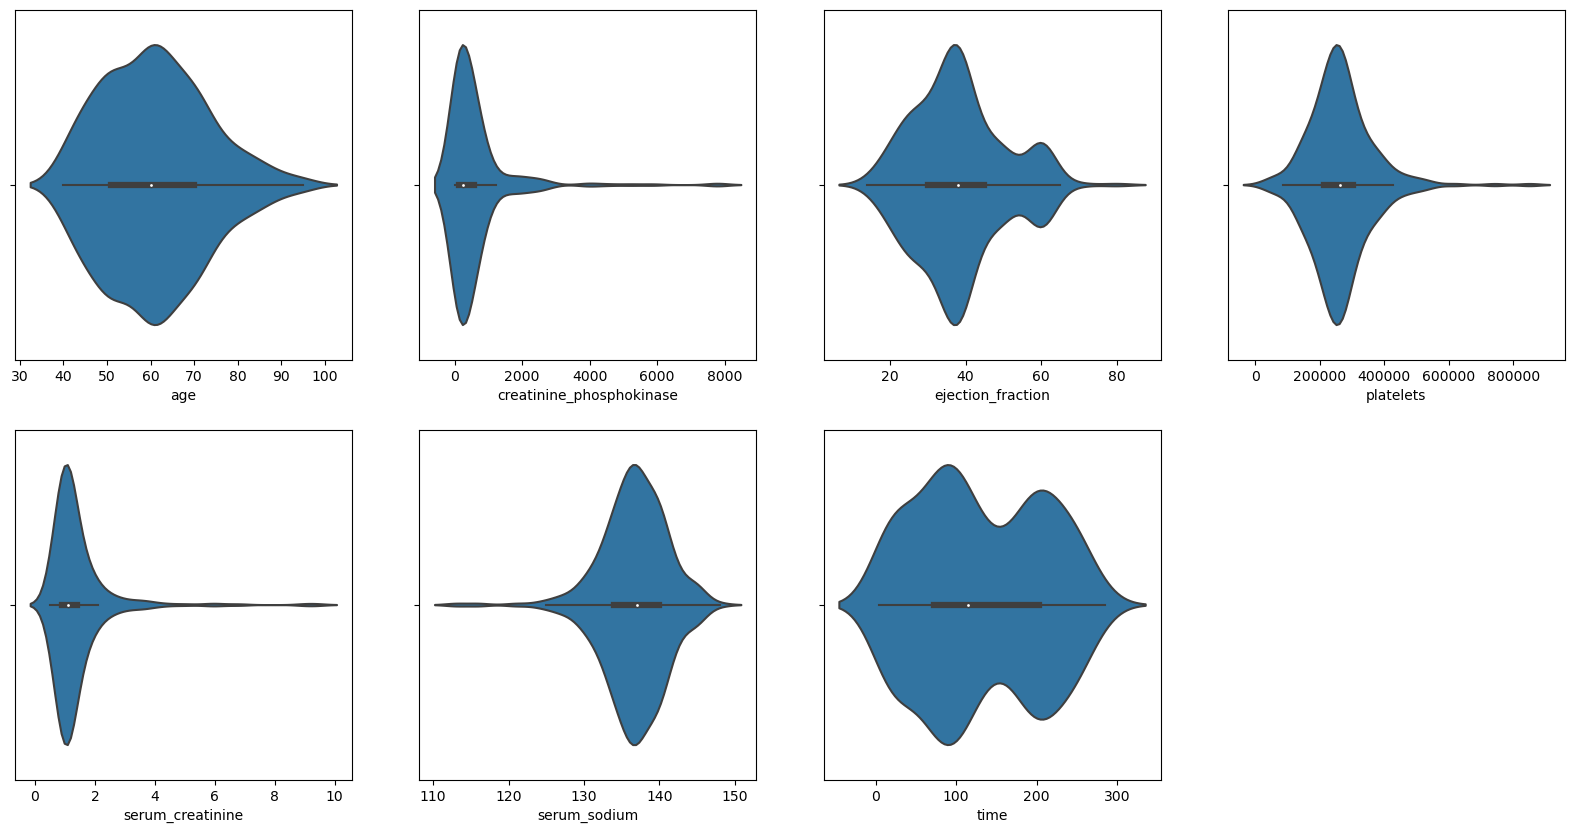

In [54]:
fig = plt.figure(figsize=(20,10))
j=1
for i in num_col:
    plt.subplot(2,4,j)
    sns.violinplot(df[i])
    j=j+1

***Checking the Categorical Columns Data***

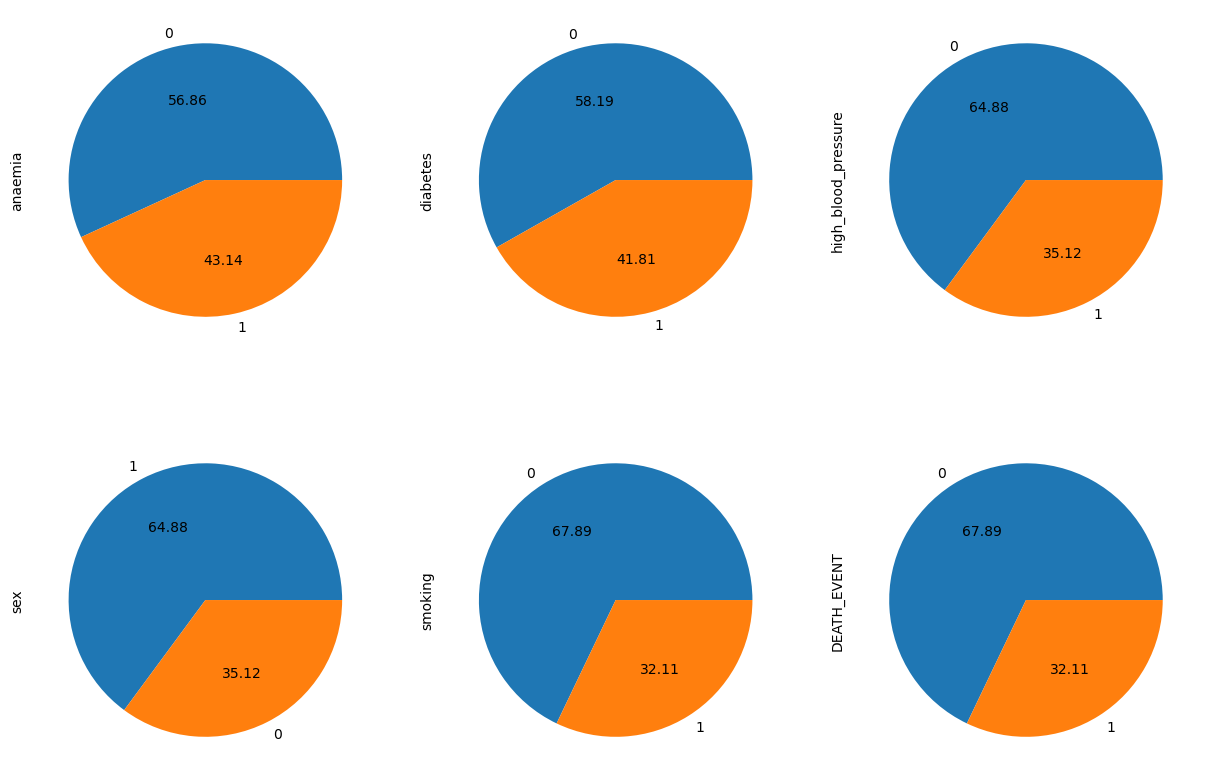

In [55]:
cat_col = [ 'anaemia', 'diabetes','high_blood_pressure', 'sex', 'smoking','DEATH_EVENT']
fig = plt.figure(figsize = (15,10))
j=1
for i in cat_col:
    plt.subplot(2,3,j)
    df[i].value_counts().plot(kind ='pie',autopct = '%.2f')
    j=j+1

1. Sex - Male- 64.88 , Female- 35.12
1. Diabetes - No = 58.19, Yes = 41.81
1. Anaemia - No = 56.86 , Yes = 43.14
1. High_blood_pressure - No = 64.88, Yes = 35.12
1. Smoking - No = 67.89, Yes = 32.11
1. DEATH_EVENT - No = 67.89, Yes = 32.11

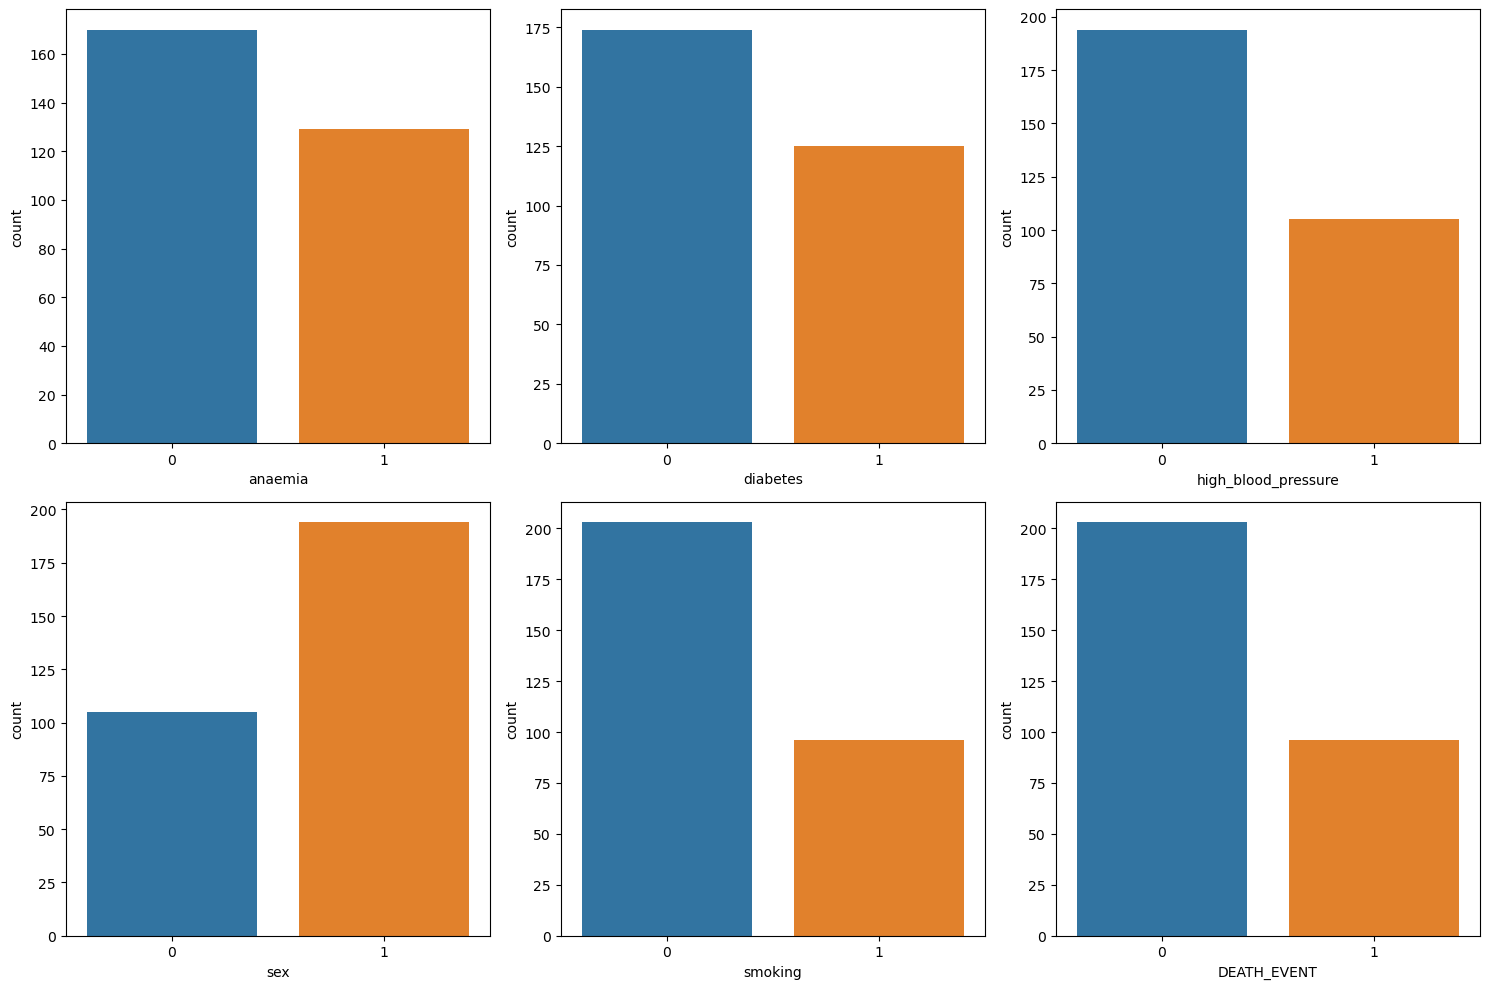

In [56]:
fig = plt.figure(figsize=(15, 10))
j = 1

for i in cat_col:
    plt.subplot(2, 3, j)
    sns.countplot(data=df, x=i)
    
    j = j + 1

plt.tight_layout()
plt.show()

We can assume here that 
1. Sex --> Gender of the patient --> 1 = Male , 0 = Female
2. Diabetes --> 0 = No , 1 = Yes
3. Anaemia --> 0 = No , 1 = Yes
4. High_blood_pressure --> 0 = No , 1 = Yes
5. Smoking --> 0 = No , 1 = Yes
6. Death_Event --> 0 = No , 1 = Yes

***Analyzing the event of death for diabetes and anaemia wrt age***

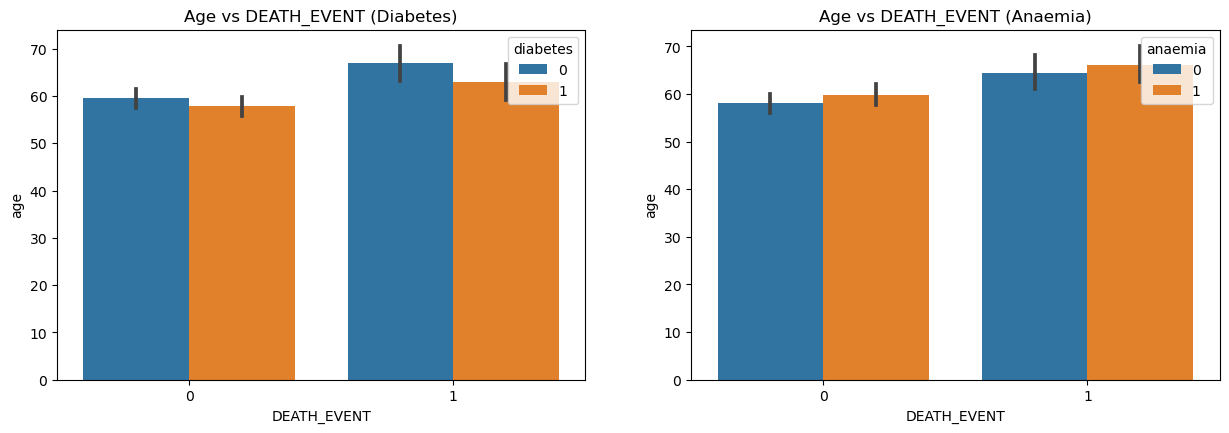

In [57]:
fig =  plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.barplot(x = df['DEATH_EVENT'] ,y = df['age'] , hue = df['diabetes'])
plt.title("Age vs DEATH_EVENT (Diabetes)")
plt.subplot(2,2,2)
sns.barplot(x = df['DEATH_EVENT'] , y = df['age'] , hue = df['anaemia']) 
plt.title("Age vs DEATH_EVENT (Anaemia)")
plt.show()

The chances of death increases in a person who is old and has diabetes and anaemia


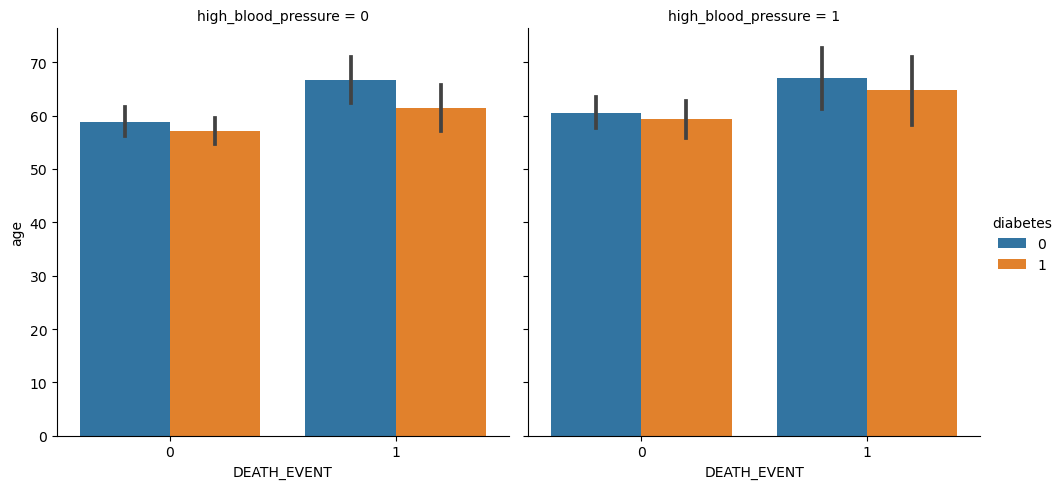

In [58]:
sns.catplot(x = 'DEATH_EVENT', y= 'age', data =df, kind='bar' , hue ='diabetes',col ='high_blood_pressure')

Old people with high blood pressure and diabetic are likely to die earlier

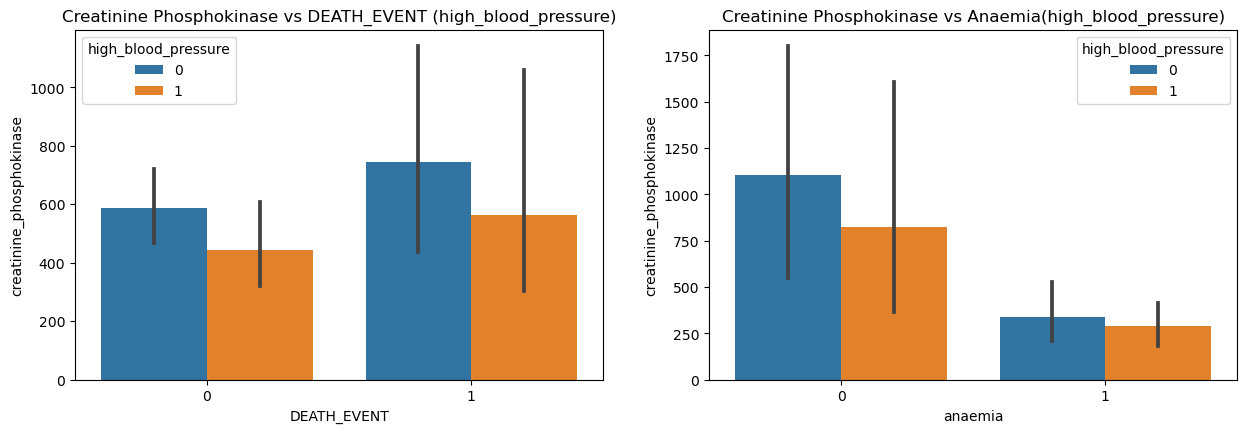

In [59]:
fig =  plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.barplot(x = df['DEATH_EVENT'], y = df['creatinine_phosphokinase'],hue=df['high_blood_pressure'])
plt.title("Creatinine Phosphokinase vs DEATH_EVENT (high_blood_pressure)")
plt.subplot(2,2,2)
data = df[df['DEATH_EVENT'] == 1]
sns.barplot(x = data['anaemia'], y = data['creatinine_phosphokinase'] , hue =data['high_blood_pressure'])
plt.title("Creatinine Phosphokinase vs Anaemia(high_blood_pressure)")
plt.show()

People who are suffering from high_blood_pressure and anaemia have low creatinine_phosphokinase. So its important to have higher creatinine_phosphokinase

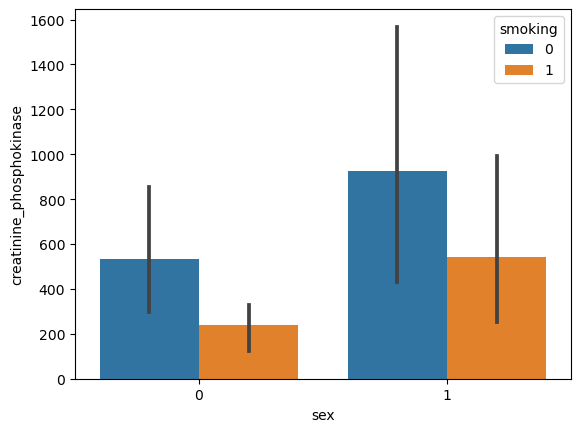

In [60]:
data = df[df['DEATH_EVENT'] == 1]
sns.barplot(x = data['sex'],y = data['creatinine_phosphokinase'] , hue =data['smoking'])
plt.show()

Deaths for a male smoker > female smoker also creatinine_phosphokinase is more in Male

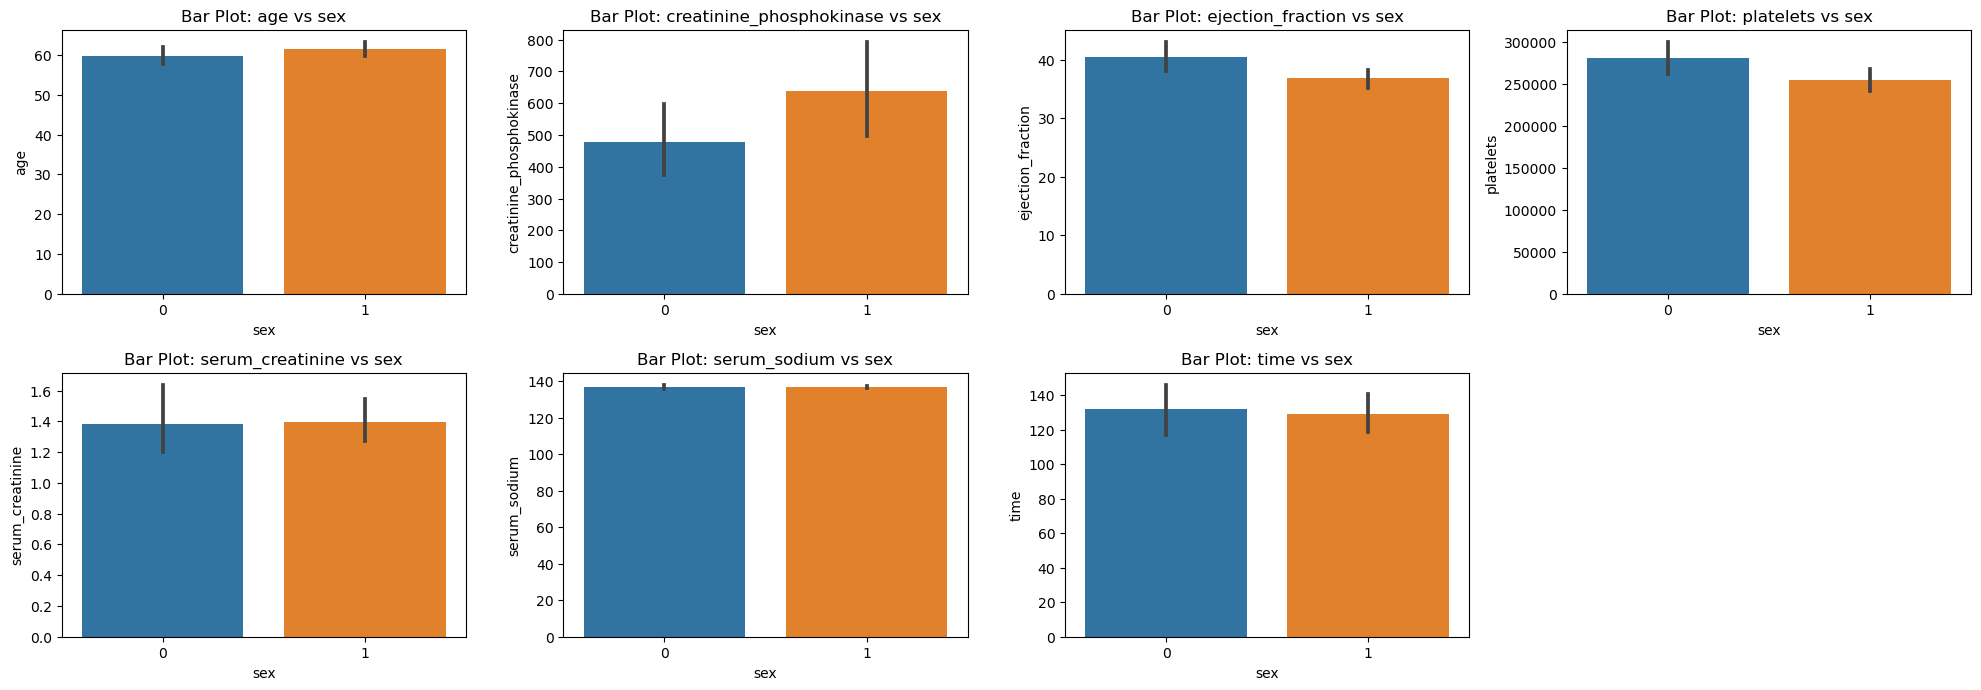

In [61]:

fig = plt.figure(figsize=(20, 10))
j = 1

for i in num_col:
    plt.subplot(3, 4, j)
    sns.barplot(x='sex', y=i, data=df)
    plt.title(f'Bar Plot: {i} vs sex')
    j = j + 1

plt.tight_layout()
plt.show()

Male have less ejection_fraction than women

Platelets count is also slightly high in women

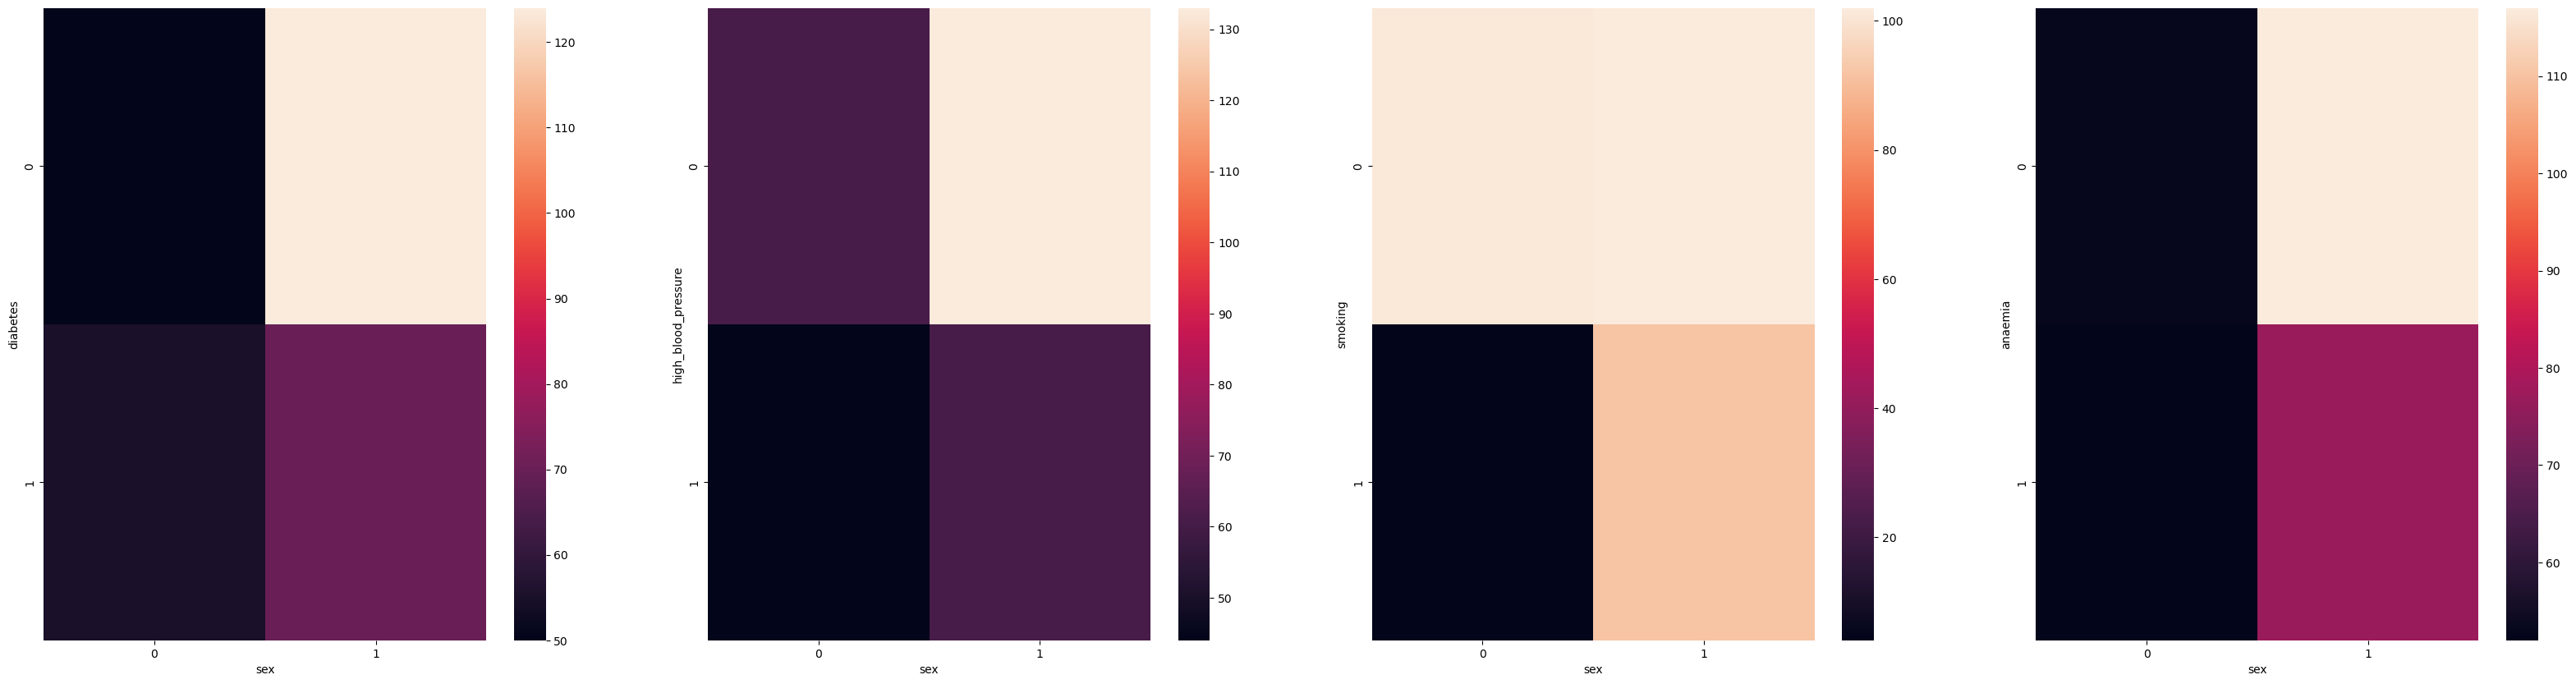

In [62]:
fig = plt.figure(figsize =(40,10))

# Visualizing Diabetes vs Sex
plt.subplot(1,4,1)
map = pd.crosstab(df['diabetes'],df['sex'])
sns.heatmap(map)

# Visualizing High Blood Pressure vs Sex
plt.subplot(1,4,2)
map = pd.crosstab(df['high_blood_pressure'],df['sex'])
sns.heatmap(map)

# Visualizing Smoking vs Sex
plt.subplot(1,4,3)
map = pd.crosstab(df['smoking'],df['sex'])
sns.heatmap(map)

# Visualizing Anaemia vs Sex
plt.subplot(1,4,4)
map = pd.crosstab(df['anaemia'],df['sex'])
sns.heatmap(map)

plt.show()

Men are more diabetic than women.
Men are having more blood pressure than women

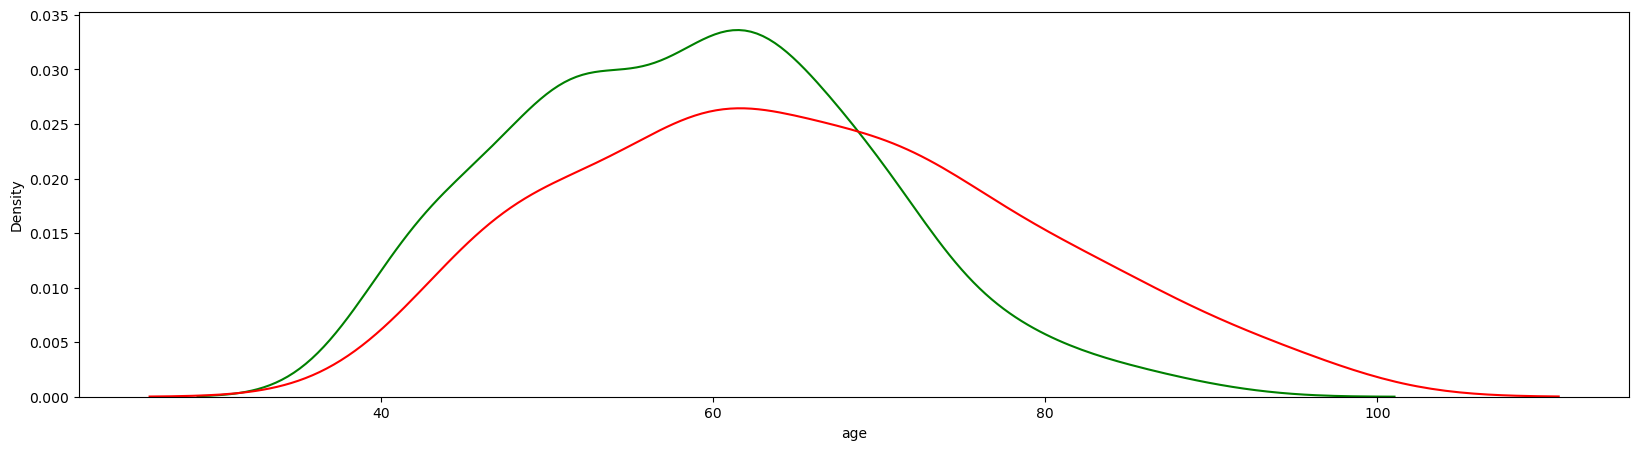

In [63]:
fig = plt.figure(figsize =(20,5))
sns.distplot(df[df['DEATH_EVENT'] == 0]['age'],hist = False,color = 'green')
sns.distplot(df[df['DEATH_EVENT'] == 1]['age'],hist =False, color='red')
plt.show()

***If a person is above 70 then his chances of getting a heart failure is high***

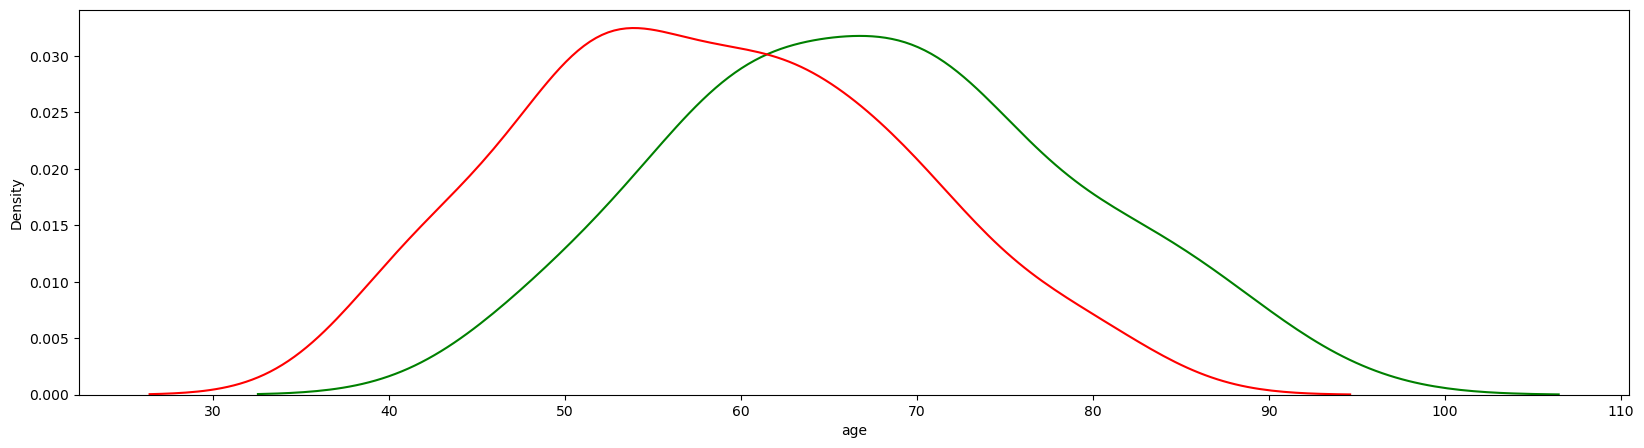

In [64]:
death =df[df['DEATH_EVENT'] == 1]
live =df[df['DEATH_EVENT'] == 0]

fig = plt.figure(figsize =(20,5))
sns.distplot(death[death['smoking'] == 1]['age'],hist = False,color = 'green')
sns.distplot(live[live['smoking'] == 1]['age'],hist =False, color='red')

plt.show()

A Smoker has a higher chance of heartfailure having same age as that of a Non Smoker

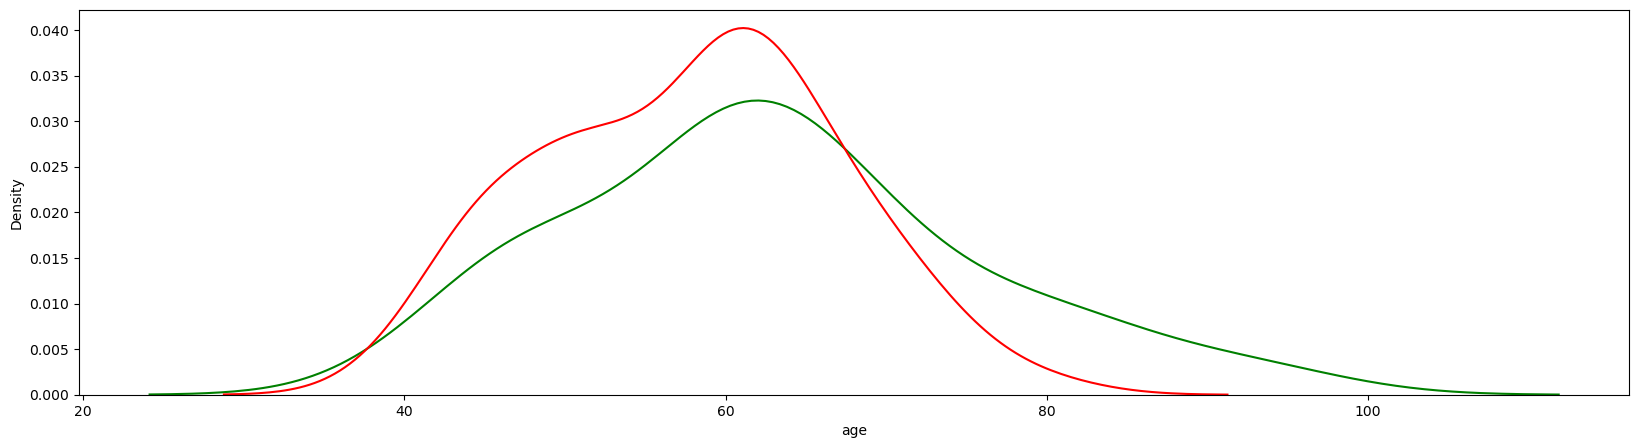

In [65]:
death =df[df['DEATH_EVENT'] == 1]
live =df[df['DEATH_EVENT'] == 0]

fig = plt.figure(figsize =(20,5))
sns.distplot(death[death['diabetes'] == 1]['age'],hist = False,color = 'green')
sns.distplot(live[live['diabetes'] == 1]['age'],hist =False, color='red')

plt.show()

Similar result for diabetes, at a lower age chances of getting a heart failure is high for a diabetic person

<AxesSubplot:xlabel='age', ylabel='Density'>

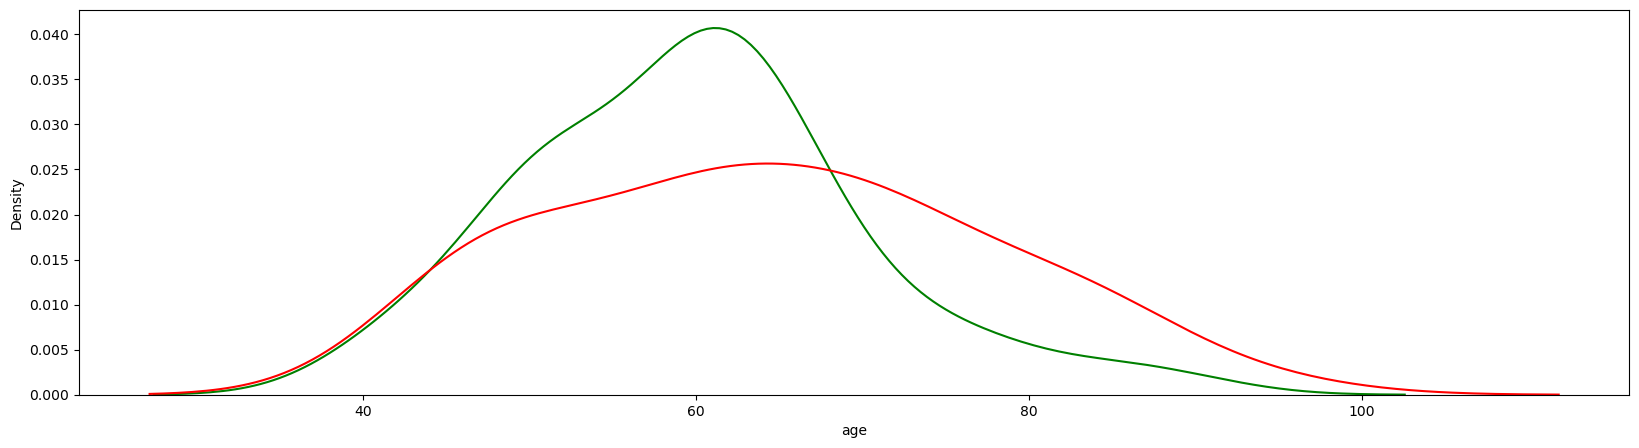

In [66]:
data1 = df[df['DEATH_EVENT'] == 1]
data2 = df[df['DEATH_EVENT'] == 0]

fig = plt.figure(figsize = (20,5))
sns.distplot(data2[data2['anaemia'] == 1]['age'] , hist = False , color = 'green')
sns.distplot(data1[data1["anaemia"] == 0]['age'] , hist = False , color = 'red')

A person suffering from anemia has fatality when crossing age of 70

# Feature Engineering

In [67]:
q1 = df['platelets'].quantile(0.25)
q3 = df['platelets'].quantile(0.75)
iqr = q3 - q1
mini = q1 - 1.5* iqr
maxi = q3 + 1.5*iqr
df['platelets'].max(), maxi

(850000.0, 440000.0)

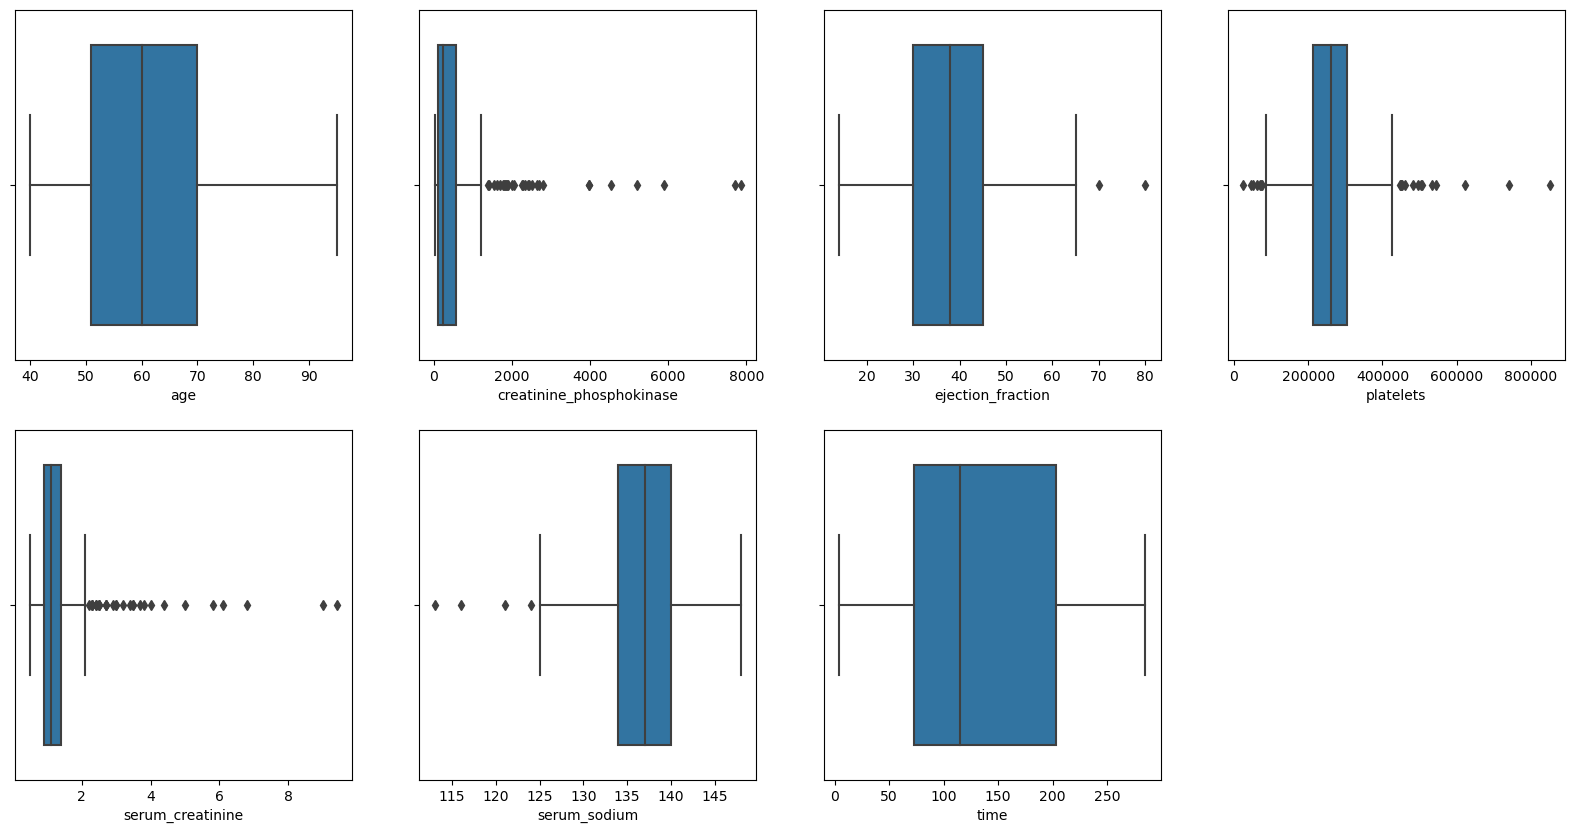

In [68]:
fig = plt.figure(figsize=(20,10))
j=1
for i in num_col:
    plt.subplot(2,4,j)
    sns.boxplot(df[i])
    j=j+1

***Handling Outliers***

In [69]:
outliers = ['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']

In [70]:
df1 = df.copy()
for i in outliers:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    
    iqr  = q3 - q1
    minimum = q1 - 1.5* iqr
    maximum = q3 + 1.5*iqr
    

    df1[i] = np.where(
    df1[i] > maximum,
    maximum,
    np.where(
        df1[i] < minimum,
        minimum,
        df1[i]
        )
    )

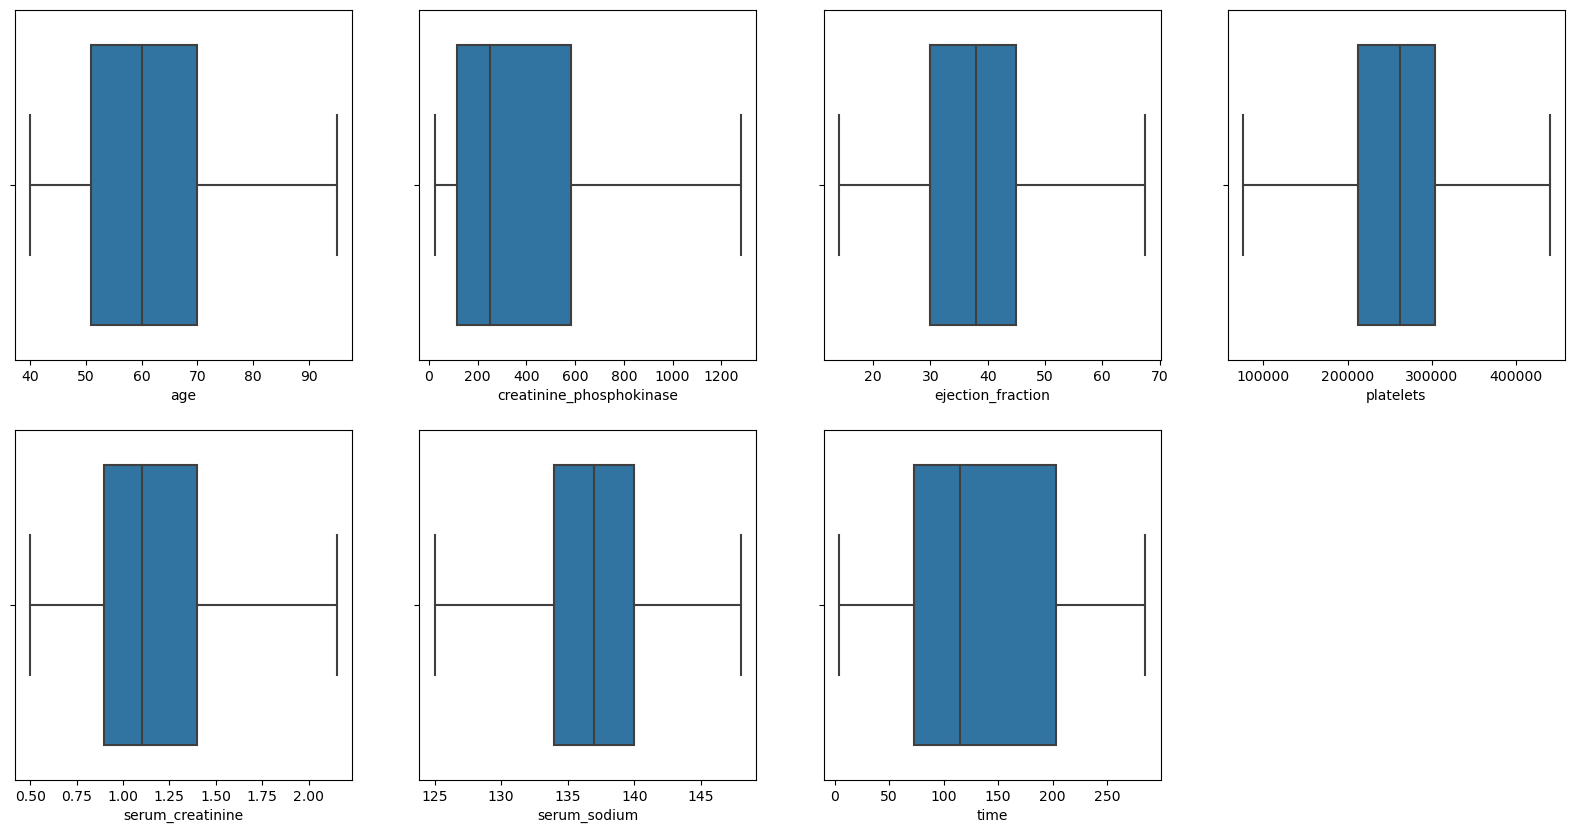

In [71]:
fig = plt.figure(figsize=(20,10))
j=1
for i in num_col:
    plt.subplot(2,4,j)
    sns.boxplot(df1[i])
    j=j+1

***Now all the outliers are handled***

In [72]:
# importing libraries
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler

In [73]:
X = df1['creatinine_phosphokinase']

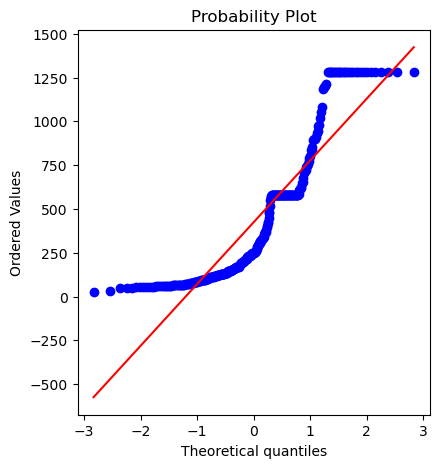

In [74]:
# Plottting QQ plots for creatinine_phosphokinase 
fig = plt.figure(figsize=(10,5))

plt.subplot(121)
stats.probplot(df1['creatinine_phosphokinase'], dist ="norm", plot = plt)
plt.show()

In [75]:
trf = FunctionTransformer(func=np.log1p)
X_train_transformed = trf.fit_transform(X)

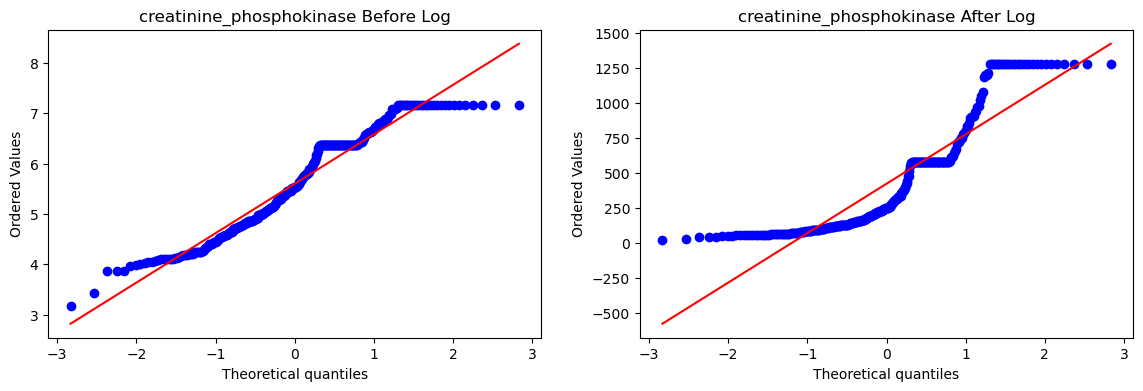

In [76]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train_transformed, dist="norm", plot=plt)
plt.title('creatinine_phosphokinase Before Log')

plt.subplot(122)
stats.probplot(X, dist="norm", plot=plt)
plt.title('creatinine_phosphokinase After Log')

plt.show()

In [77]:
# replacing the transformed value into our original dataframe
df1['creatinine_phosphokinase']  = X_train_transformed

In [78]:
# Extarcting X and y 
X = df1.drop(columns = 'DEATH_EVENT')
y = df['DEATH_EVENT']

In [79]:
x_train,x_test,y_train,y_test = train_test_split(X,y ,test_size =0.2 ,random_state = 12)

In [80]:
# Feature Scaling

scaler = StandardScaler()
x_train_scaled  = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [81]:
x_train_scaled.shape

(239, 12)

In [82]:
x_test_scaled.shape

(60, 12)

# Model Selection

In [83]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,recall_score,precision_score


In [84]:
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_test_scaled)

accuracy_score(y_test,y_pred)

0.8333333333333334

In [85]:
lr2 = DecisionTreeClassifier()
lr.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_test_scaled)

accuracy_score(y_test,y_pred)

0.8333333333333334

In [86]:
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8333333333333334
0.7142857142857143
0.7894736842105263
0.7894736842105263


Accuracy Score Metric gives around 83% accuracy